In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import jinja2
from pycaret.regression import *

In [2]:
#Reading csv file with pandas read_csv and equal it to df1 as variable name
df1 = pd.read_csv('2017.csv')

In [3]:
#Dropping last column which is only contains NAN values then change our variable to df
df = df1.drop('Unnamed: 23', 1)

In [4]:
#checking our dataset first 5 rows
df.head()

Year  Month  Day  Hour  Minute  Temperature  Clearsky DHI  Clearsky DNI  \
0  2017      1    1     0      30          3.7             0             0   
1  2017      1    1     1      30          3.3             0             0   
2  2017      1    1     2      30          3.0             0             0   
3  2017      1    1     3      30          2.7             0             0   
4  2017      1    1     4      30          2.4             0             0   

   Clearsky GHI  Cloud Type  Dew Point  DHI  DNI  Fill Flag  GHI  Ozone  \
0             0           7        2.4    0    0          0    0  0.367   
1             0           4        1.9    0    0          0    0  0.365   
2             0           4        1.5    0    0          0    0  0.362   
3             0           4        1.0    0    0          0    0  0.358   
4             0           4        0.6    0    0          0    0  0.353   

   Relative Humidity  Solar Zenith Angle  Surface Albedo  Pressure  \
0              91.03              145.08            0.87      1020   
1              90.70              134.10            0.87      1020   
2              89.67              122.82            0.87      1020   
3              88.72              111.63            0.87      1021   
4              87.90              100.81            0.87      1021   

   Precipitable Water  Wind Direction  Wind Speed  
0                 1.3             310         3.2  
1                 1.2             309         3.0  
2                 1.2             305         2.6  
3                 1.2             295         2.2  
4                 1.2             280         1.9

In [5]:
#checking our dataset last 5 rows to be sure it sorted as hourly last rows contains 31/12/2017 23.30
df.tail()

Year  Month  Day  Hour  Minute  Temperature  Clearsky DHI  Clearsky DNI  \
8755  2017     12   31    19      30          6.6             0             0   
8756  2017     12   31    20      30          6.5             0             0   
8757  2017     12   31    21      30          6.5             0             0   
8758  2017     12   31    22      30          6.4             0             0   
8759  2017     12   31    23      30          6.3             0             0   

      Clearsky GHI  Cloud Type  Dew Point  DHI  DNI  Fill Flag  GHI  Ozone  \
8755             0           0        5.1    0    0          0    0  0.367   
8756             0           0        5.1    0    0          0    0  0.363   
8757             0           0        5.1    0    0          0    0  0.358   
8758             0           0        5.1    0    0          0    0  0.352   
8759             0           0        5.0    0    0          0    0  0.348   

      Relative Humidity  Solar Zenith Angle  Surface Albedo  Pressure  \
8755              90.03              142.62            0.11      1016   
8756              90.72              152.84            0.11      1017   
8757              90.81              160.35            0.11      1016   
8758              91.40              161.30            0.11      1016   
8759              91.50              154.91            0.11      1016   

      Precipitable Water  Wind Direction  Wind Speed  
8755                 1.1             220         2.3  
8756                 1.2             225         2.4  
8757                 1.2             228         2.6  
8758                 1.3             231         2.8  
8759                 1.3             233         2.9

In [6]:
df.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Temperature', 'Clearsky DHI',
       'Clearsky DNI', 'Clearsky GHI', 'Cloud Type', 'Dew Point', 'DHI', 'DNI',
       'Fill Flag', 'GHI', 'Ozone', 'Relative Humidity', 'Solar Zenith Angle',
       'Surface Albedo', 'Pressure', 'Precipitable Water', 'Wind Direction',
       'Wind Speed'],
      dtype='object')

Text(0.5, 1.0, 'Missing value in the dataset')

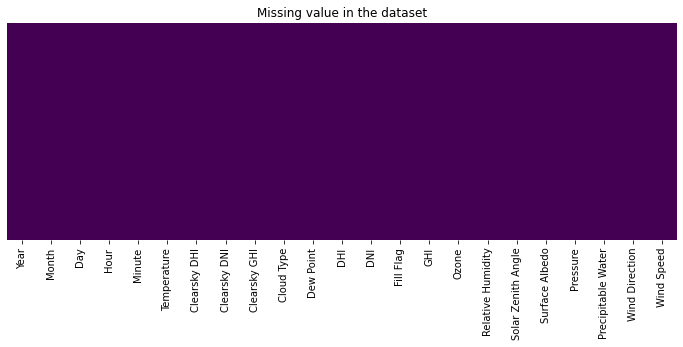

In [7]:
#Visualize summary of null values.
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset')

In [8]:
df.shape

(8760, 23)

In [9]:
#  We removed 0 values of DNI our target value, its pointless to keep them, cause we dont need night times when sun light doesnt exist
df = df_no_zero = df.loc[df['DNI']!= 0 ]
assert len(df_no_zero['DNI'])==len(df_no_zero['GHI'])

In [10]:
#Our data consist 3167 rows and 23 columns
df.shape 

(3167, 23)

In [11]:
#we created loop which is get row's year,month,day,hour and minute columns and make 1 column name is date_time
cols = ["Year","Month","Day","Hour","Minute"]
df["date_time"] = df[cols].apply(lambda row: "-".join(row.values.astype(str)), axis=1)

In [12]:
#Giving date_time column format
#dropping our 5 columns cause we already got column name date_time contain this info
#setting date_time index
df['date_time'] = pd.to_datetime(df['date_time'], format='%Y-%m-%d-%H-%M')
df=df.drop(["Year","Month","Day","Hour","Minute"],axis = 1)
df=df.set_index('date_time')

In [13]:
df.sort_index(axis = 1)

Clearsky DHI  Clearsky DNI  Clearsky GHI  Cloud Type  \
date_time                                                                   
2017-01-01 09:30:00           130           720           439           4   
2017-01-01 10:30:00           128           738           449           4   
2017-01-01 11:30:00           115           720           398           4   
2017-01-01 12:30:00            91           672           298           4   
2017-01-02 06:30:00            42           528           122           0   
...                           ...           ...           ...         ...   
2017-12-29 09:30:00            86           750           406           7   
2017-12-30 08:30:00            79           721           350           7   
2017-12-30 09:30:00            85           760           409           7   
2017-12-31 13:30:00            63           403           137           1   
2017-12-31 14:30:00            15            77            17           1   

                     DHI  DNI  Dew Point  Fill Flag  GHI  Ozone  \
date_time                                                         
2017-01-01 09:30:00  186  170       -0.1          0  259  0.335   
2017-01-01 10:30:00  167  354       -0.1          0  320  0.334   
2017-01-01 11:30:00  151  324        0.0          0  278  0.333   
2017-01-01 12:30:00  113   14        0.0          0  118  0.331   
2017-01-02 06:30:00   42  528       -0.9          0  122  0.296   
...                  ...  ...        ...        ...  ...    ...   
2017-12-29 09:30:00  185  148        8.6          0  249  0.321   
2017-12-30 08:30:00  143   22        8.1          0  151  0.341   
2017-12-30 09:30:00  183  205        8.4          0  270  0.340   
2017-12-31 13:30:00   63  403        5.3          0  137  0.407   
2017-12-31 14:30:00   15   77        5.2          0   17  0.409   

                     Precipitable Water  Pressure  Relative Humidity  \
date_time                                                              
2017-01-01 09:30:00                 1.0      1021              75.46   
2017-01-01 10:30:00                 0.9      1021              74.36   
2017-01-01 11:30:00                 0.9      1020              73.58   
2017-01-01 12:30:00                 0.8      1020              73.54   
2017-01-02 06:30:00                 0.6      1020              82.48   
...                                 ...       ...                ...   
2017-12-29 09:30:00                 2.1      1006              78.19   
2017-12-30 08:30:00                 1.9      1006              79.58   
2017-12-30 09:30:00                 1.9      1005              77.80   
2017-12-31 13:30:00                 1.4      1016              85.83   
2017-12-31 14:30:00                 1.4      1016              86.47   

                     Solar Zenith Angle  Surface Albedo  Temperature  \
date_time                                                              
2017-01-01 09:30:00               64.60            0.87          3.8   
2017-01-01 10:30:00               64.24            0.87          4.1   
2017-01-01 11:30:00               66.83            0.87          4.3   
2017-01-01 12:30:00               72.05            0.87          4.3   
2017-01-02 06:30:00               81.36            0.12          1.8   
...                                 ...             ...          ...   
2017-12-29 09:30:00               64.79            0.12         12.3   
2017-12-30 08:30:00               67.96            0.11         11.5   
2017-12-30 09:30:00               64.74            0.11         12.2   
2017-12-31 13:30:00               79.50            0.11          7.5   
2017-12-31 14:30:00               88.15            0.11          7.3   

                     Wind Direction  Wind Speed  
date_time                                        
2017-01-01 09:30:00             229         2.6  
2017-01-01 10:30:00             226         2.7  
2017-01-01 11:30:00             223         2.8  
2017-01-01 12:30:00    

In [14]:
#lets check our columns
df.columns

Index(['Temperature', 'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI',
       'Cloud Type', 'Dew Point', 'DHI', 'DNI', 'Fill Flag', 'GHI', 'Ozone',
       'Relative Humidity', 'Solar Zenith Angle', 'Surface Albedo', 'Pressure',
       'Precipitable Water', 'Wind Direction', 'Wind Speed'],
      dtype='object')

In [15]:
df.shape

(3167, 18)

In [16]:
'''DNI is Direct Normal Irradiance while GHI and DHI are diffused
They measured by different sensor DNI measured by Pyrheliometer while other two measured by pyranometer
 Cause of reasons, we'll drop Clearsky DNI (before we start) almost identical with DNI column.
 '''

"DNI is Direct Normal Irradiance while GHI and DHI are diffused\nThey measured by different sensor DNI measured by Pyrheliometer while other two measured by pyranometer\n Cause of reasons, we'll drop Clearsky DNI (before we start) almost identical with DNI column.\n "

In [17]:
df = df.drop('Clearsky DNI', 1)

In [18]:
df.shape

(3167, 17)

In [19]:
#Describe dataframe
df.describe()

Temperature  Clearsky DHI  Clearsky GHI   Cloud Type    Dew Point  \
count  3167.000000   3167.000000   3167.000000  3167.000000  3167.000000   
mean     19.187528    116.820019    505.155352     1.431955    12.519230   
std       6.791943     55.232694    279.651610     2.271600     5.849655   
min       0.200000      4.000000      4.000000     0.000000    -5.700000   
25%      14.000000     80.000000    272.500000     0.000000     8.200000   
50%      19.700000    113.000000    512.000000     0.000000    13.000000   
75%      25.000000    149.000000    752.000000     2.000000    17.500000   
max      34.200000    414.000000    996.000000    12.000000    24.700000   

               DHI          DNI    Fill Flag          GHI        Ozone  \
count  3167.000000  3167.000000  3167.000000  3167.000000  3167.000000   
mean    149.421219   473.062835     0.173350   428.693716     0.316864   
std      98.009137   308.579565     0.725371   268.163288     0.032649   
min       3.000000     1.000000     0.000000     4.000000     0.256000   
25%      82.000000   171.000000     0.000000   201.000000     0.290000   
50%     124.000000   502.000000     0.000000   392.000000     0.311000   
75%     187.000000   768.000000     0.000000   644.000000     0.343000   
max     473.000000   976.000000     5.000000   996.000000     0.418000   

       Relative Humidity  Solar Zenith Angle  Surface Albedo     Pressure  \
count        3167.000000         3167.000000     3167.000000  3167.000000   
mean           66.489795           55.844026        0.145122  1012.403221   
std            11.604468           19.024250        0.080748     5.258753   
min            24.960000           18.380000        0.100000   998.000000   
25%            58.340000           40.330000        0.130000  1009.000000   
50%            66.070000           57.480000        0.140000  1012.000000   
75%            74.860000           70.825000        0.140000  1015.000000   
max            98.930000           88.990000        0.870000  1030.000000   

       Precipitable Water  Wind Direction   Wind Speed  
count         3167.000000     3167.000000  3167.000000  
mean             2.108810      133.063783     3.154657  
std              0.852973      106.961068     1.611753  
min              0.400000        0.000000     0.400000  
25%              1.500000       42.000000     1.900000  
50%              2.000000       77.000000     2.900000  
75%              2.700000      229.000000     4.200000  
max              4.400000      360.000000     7.800000

Text(0, 0.5, 'DNI W/m2')

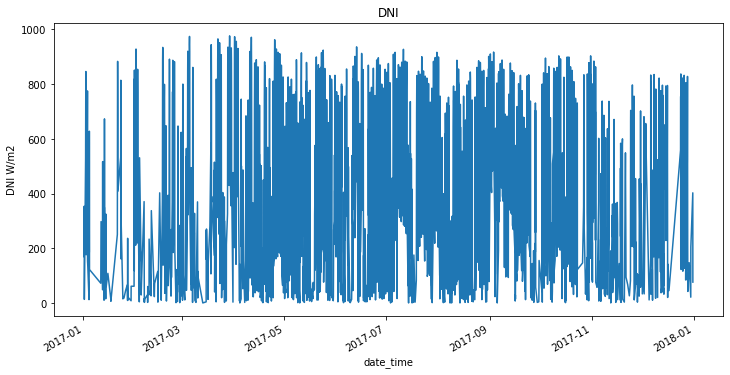

In [20]:
#preview of our target through whole year
df['DNI'].plot(figsize=(12,6), title= 'DNI')
plt.ylabel("DNI W/m2")

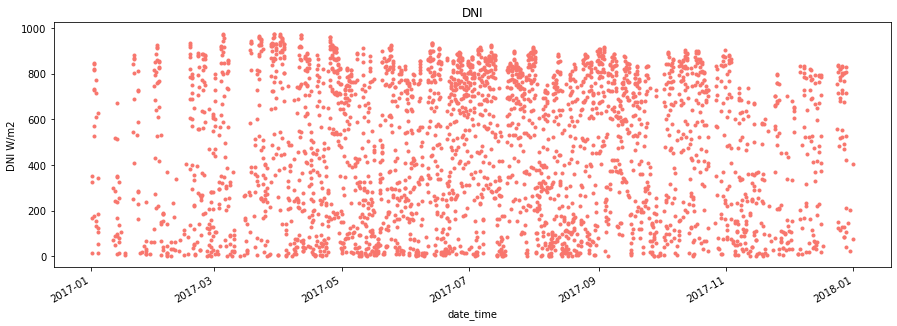

In [21]:
#same preview with dots and different color for  clearify our vision
color_pal = ['#F8766D','#D39200','#93AA00','#00BA38','#00C19F','#00B9E3','#619CFF','#DB72FB']
df['DNI'].plot(style='.',figsize=(15,5),color=color_pal[0],title='DNI')
plt.ylabel("DNI W/m2")
plt.show()

<AxesSubplot:>

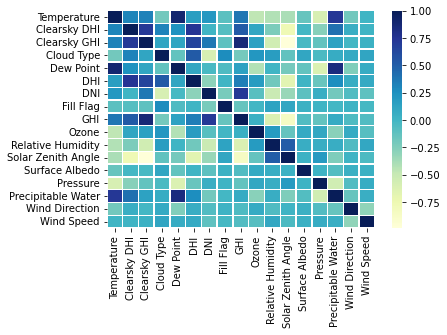

In [22]:
#Correlation between all features
corr = df.corr()
sns.heatmap(corr,cmap="YlGnBu", linewidths=.5)

In [23]:
''' Explained relationship GHI and DNI in paper;
In theory we can find GHI with equation which include DNI and DHI
Global Horizontal Irradiance (GHI) = Direct Normal Irradiance (DNI)* cos(solar zenith angle)+Diffused Horizontal Irradiance (DHI)
'''

' Explained relationship GHI and DNI in paper;\nIn theory we can find GHI with equation which include DNI and DHI\nGlobal Horizontal Irradiance (GHI) = Direct Normal Irradiance (DNI)* cos(solar zenith angle)+Diffused Horizontal Irradiance (DHI)\n'

<AxesSubplot:>

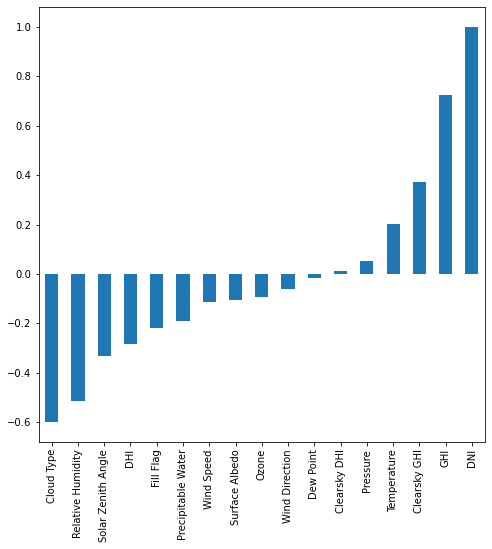

In [24]:
df.corr()["DNI"].sort_values().plot(kind="bar", figsize=(8,8))

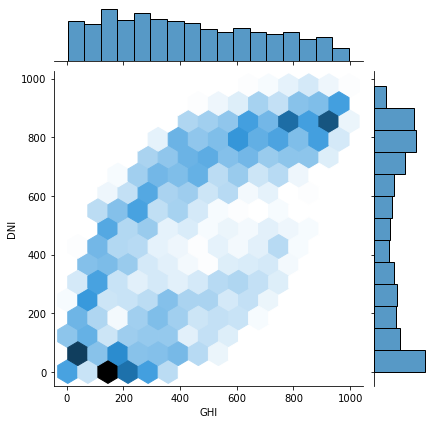

In [25]:
#so pattern between GHI and DHI with hex plot.
_ = sns.jointplot(x = "GHI", y="DNI", data=df, kind = 'hex')

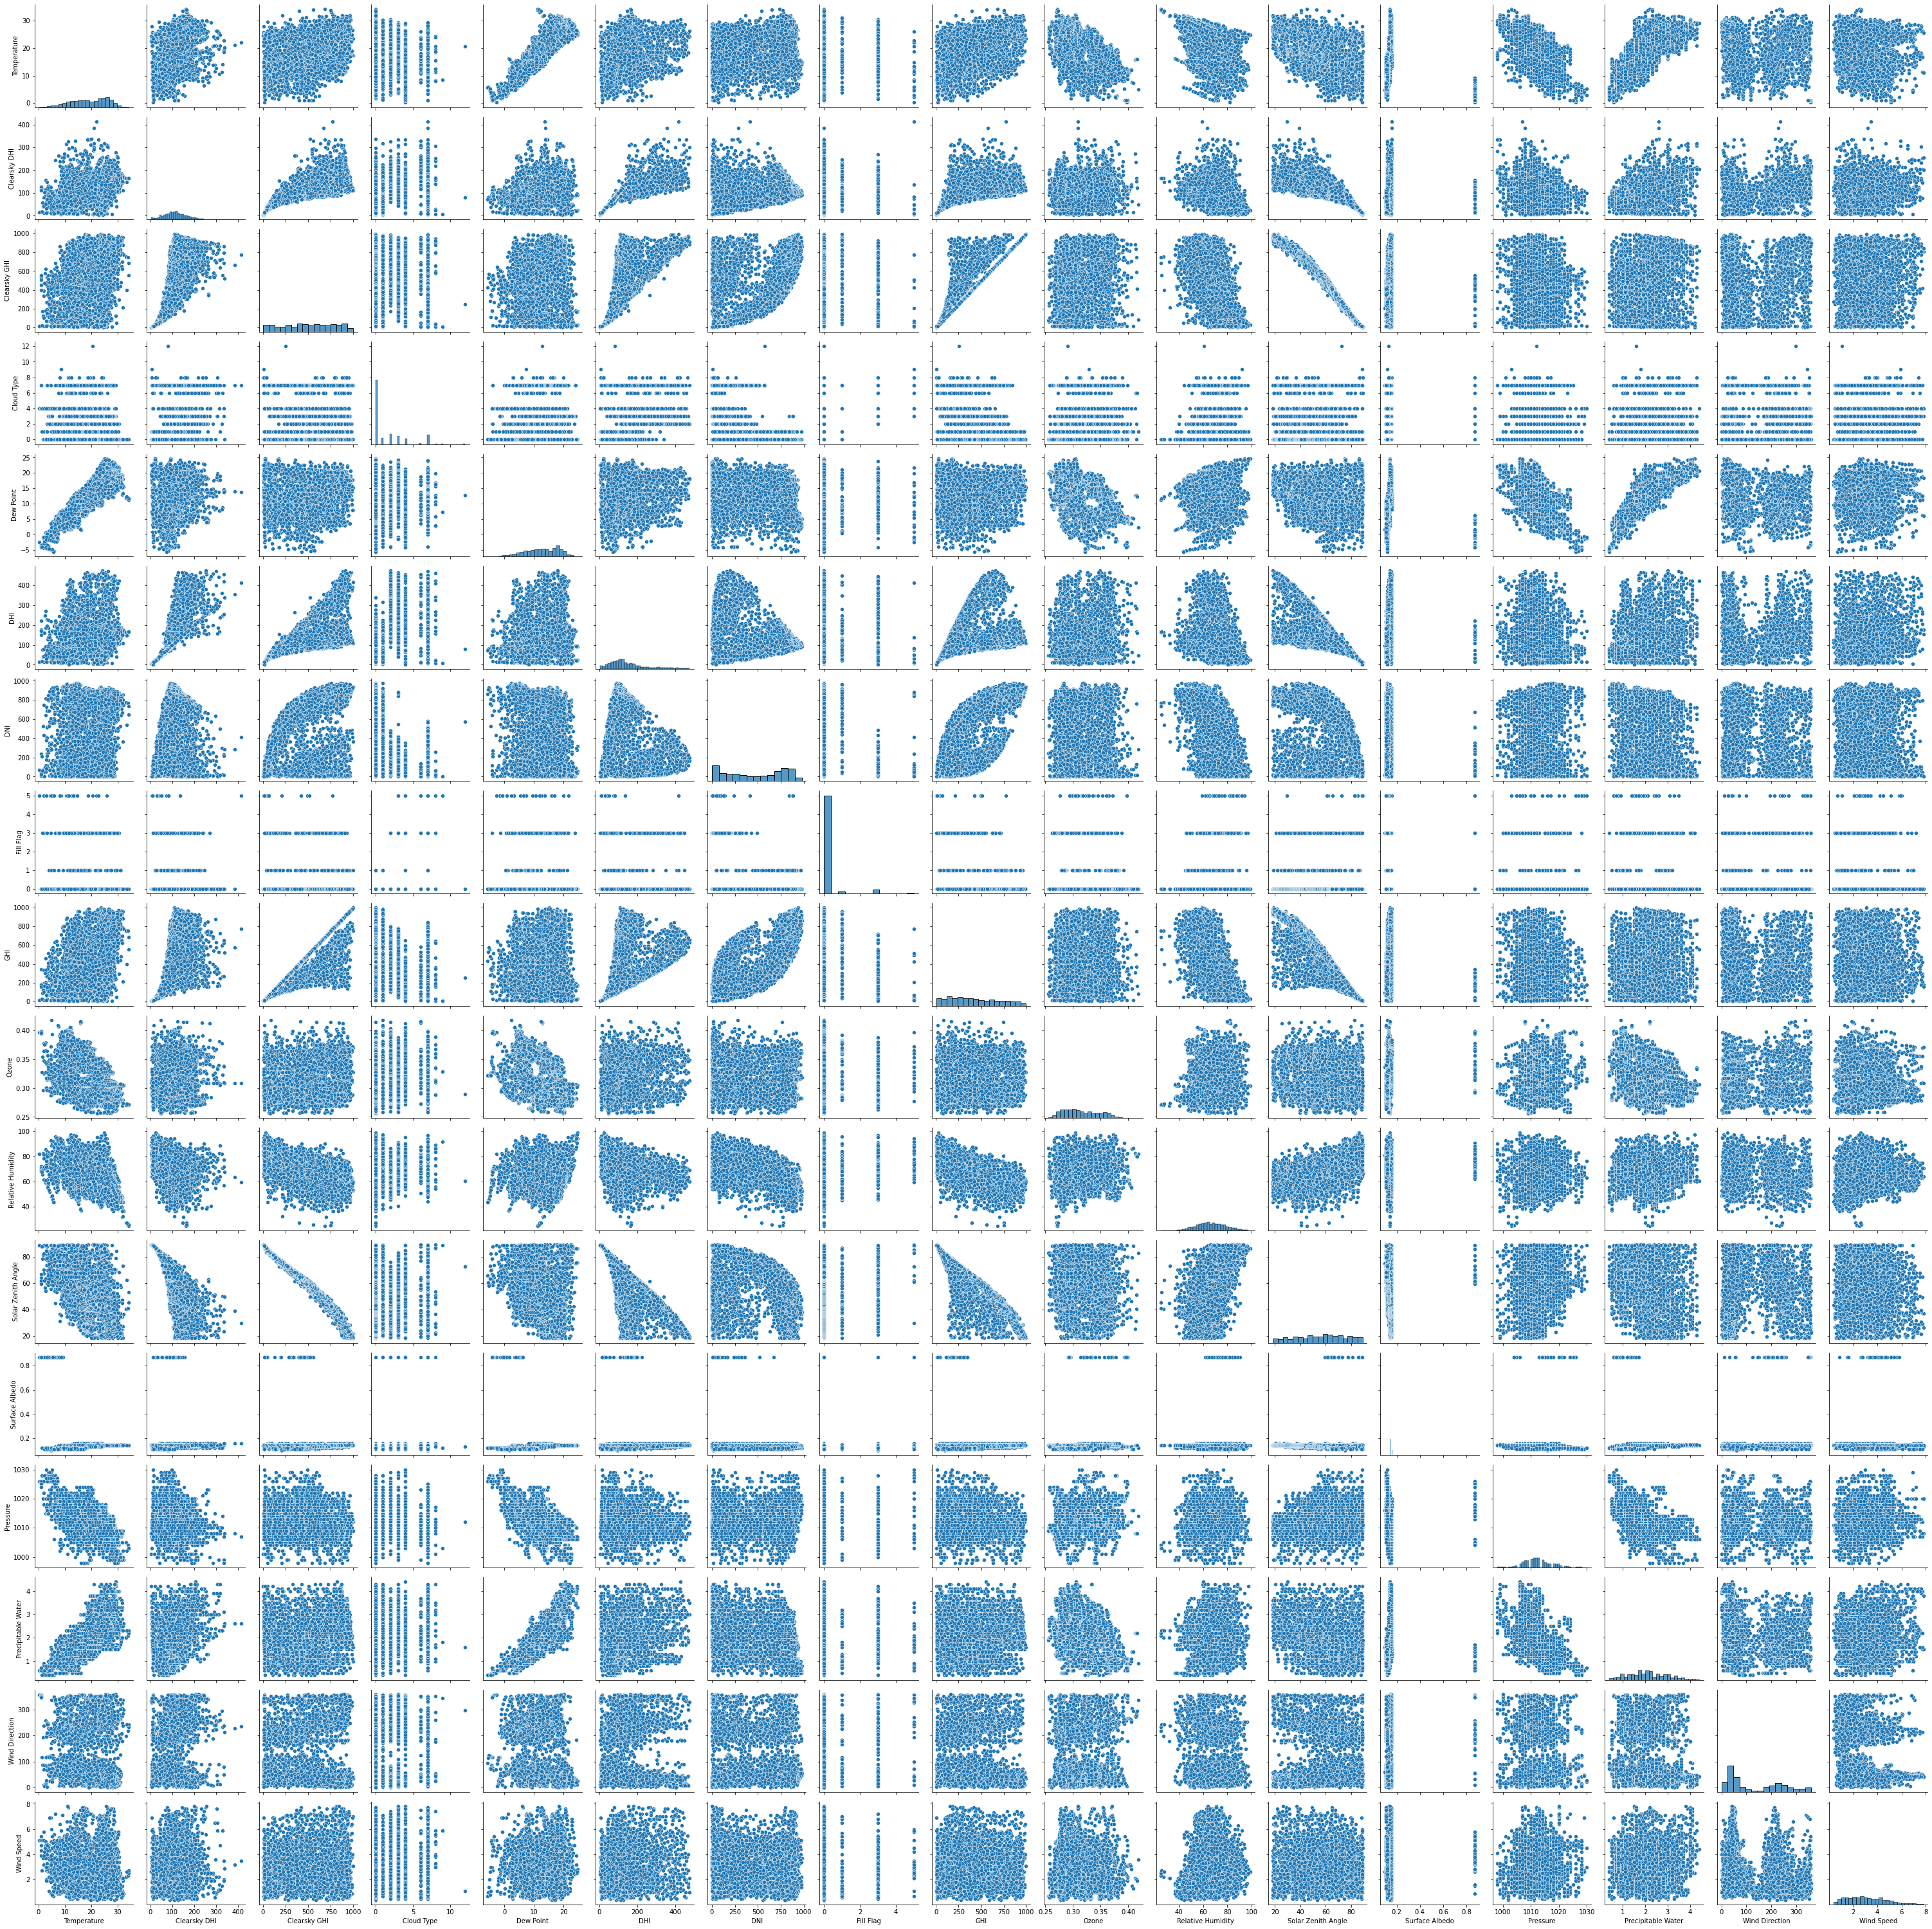

In [26]:
#Lets glance our dataset incase is  there any pattern between features? 
g = sns.PairGrid(df)
g.map_diag(sns.histplot)
_ = g.map_offdiag(sns.scatterplot)

In [27]:
'''Every data points for every columns
If you can't see it, I don't know any other solution, download it as an image and inspect it'''

"Every data points for every columns\nIf you can't see it, I don't know any other solution, download it as an image and inspect it"

In [28]:
#I used pycaret to try many different combinations as possible
#Its using Sklearn library, Used sklearn library too but this is last version for submit

In [36]:
#reg as regresion, setup adjust our dataset, split train and test, cross-validation, normalize,scale.
#We can choose what we'll do. Firstly lets start default options.
#Our target value DNI sı we just choose it then execute
reg = setup(data=df,
           target='DNI', session_id = 123)

In [37]:
#Compare 19 regression models with each other.The most successful is Catboost Regressor 
best = compare_models(exclude=['huber'])

In [31]:
print(best.get_params())

{'loss_function': 'RMSE', 'border_count': 254, 'verbose': False, 'task_type': 'CPU', 'random_state': 123}


In [32]:
#hyperparameter guides, when we create model we can give this params to our model
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

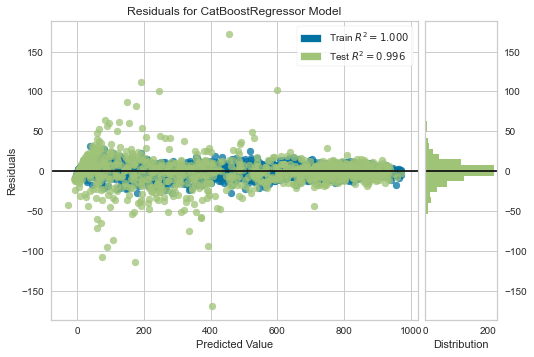

In [38]:
#Residuals
plot_model(best)

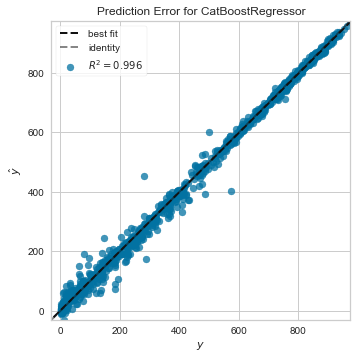

In [39]:
#Errors
plot_model(best, plot ='error')

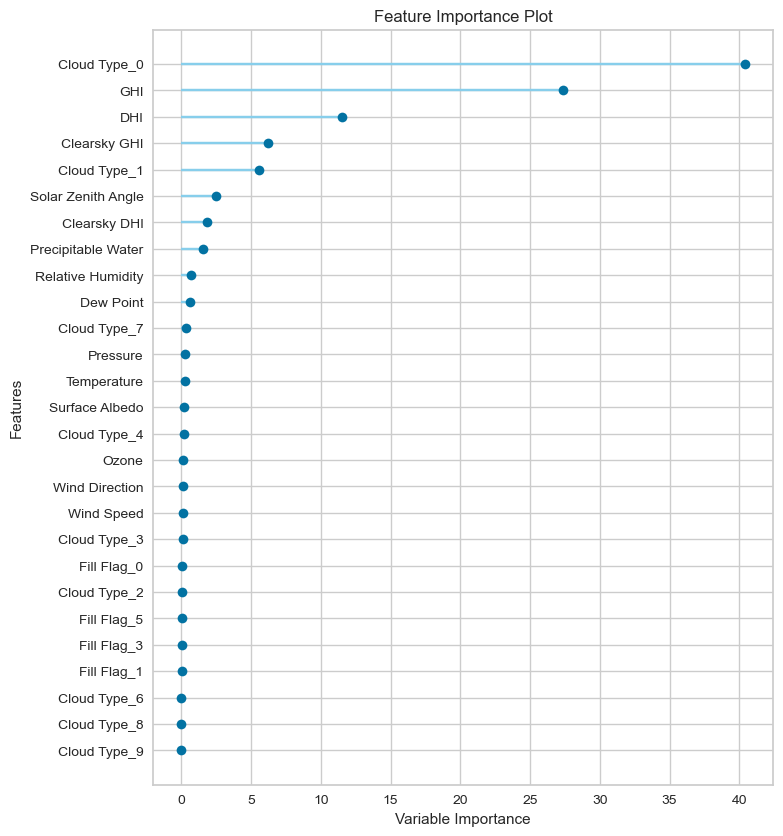

In [35]:
#All features and their value. As you can see a lot of them has got 0 contribution or like 0
#So we are aiming reduce number of inputs. But first lets use other combination on our data
plot_model(best, plot='feature_all')

In [40]:
#Lets copy our dataframe to avoid confusion
df1 = df.copy()

In [41]:
#Normalized dataset didnt improve our results.
reg = setup(data=df1,
           target='DNI',
           use_gpu = True,
           normalize=True,
           session_id = 123)

In [42]:
#Error values increased
best = compare_models(exclude=['huber'])

In [44]:
catboost = create_model('catboost')

In [46]:
print(catboost.feature_names_ )

['Temperature', 'Clearsky DHI', 'Clearsky GHI', 'Dew Point', 'DHI', 'GHI', 'Ozone', 'Relative Humidity', 'Solar Zenith Angle', 'Surface Albedo', 'Pressure', 'Precipitable Water', 'Wind Direction', 'Wind Speed', 'Cloud Type_0', 'Cloud Type_1', 'Cloud Type_2', 'Cloud Type_3', 'Cloud Type_4', 'Cloud Type_6', 'Cloud Type_7', 'Cloud Type_8', 'Cloud Type_9', 'Fill Flag_0', 'Fill Flag_1', 'Fill Flag_3', 'Fill Flag_5']


In [47]:
#tune model with optimum hypermeters. Using Random Grid Search
tuned_catboost = tune_model(catboost)

In [48]:
#Our best parameters
print(tuned_catboost.get_params())

{'depth': 6, 'l2_leaf_reg': 20, 'loss_function': 'RMSE', 'border_count': 254, 'verbose': False, 'random_strength': 0.0, 'task_type': 'CPU', 'n_estimators': 250, 'random_state': 123}


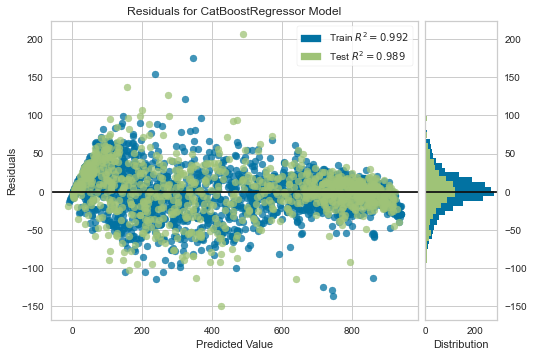

In [49]:
plot_model(tuned_catboost)

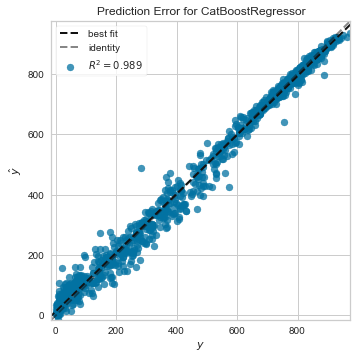

In [50]:
plot_model(tuned_catboost, plot = 'error')

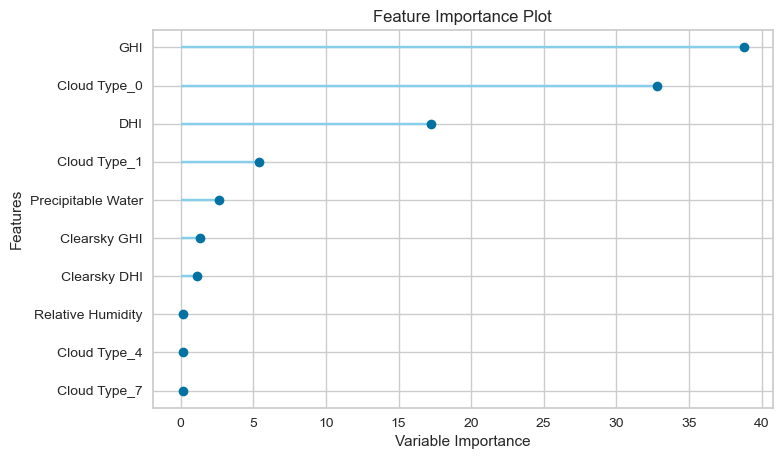

In [51]:
plot_model(tuned_catboost, plot='feature')

In [52]:
evaluate_model(tuned_catboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [53]:
final_catboost = finalize_model(tuned_catboost)

In [54]:
print(final_catboost.get_params())

{'depth': 6, 'l2_leaf_reg': 20, 'loss_function': 'RMSE', 'border_count': 254, 'verbose': False, 'random_strength': 0.0, 'task_type': 'CPU', 'n_estimators': 250, 'random_state': 123}


In [55]:
final_catboost.feature_names_

['Temperature',
 'Clearsky DHI',
 'Clearsky GHI',
 'Dew Point',
 'DHI',
 'GHI',
 'Ozone',
 'Relative Humidity',
 'Solar Zenith Angle',
 'Surface Albedo',
 'Pressure',
 'Precipitable Water',
 'Wind Direction',
 'Wind Speed',
 'Cloud Type_0',
 'Cloud Type_1',
 'Cloud Type_2',
 'Cloud Type_3',
 'Cloud Type_4',
 'Cloud Type_6',
 'Cloud Type_7',
 'Cloud Type_8',
 'Cloud Type_9',
 'Fill Flag_0',
 'Fill Flag_1',
 'Fill Flag_3',
 'Fill Flag_5']

In [56]:
df1.columns

Index(['Temperature', 'Clearsky DHI', 'Clearsky GHI', 'Cloud Type',
       'Dew Point', 'DHI', 'DNI', 'Fill Flag', 'GHI', 'Ozone',
       'Relative Humidity', 'Solar Zenith Angle', 'Surface Albedo', 'Pressure',
       'Precipitable Water', 'Wind Direction', 'Wind Speed'],
      dtype='object')

In [57]:
predict_model(final_catboost)

Temperature  Clearsky DHI  Clearsky GHI  Dew Point       DHI       GHI  \
0       0.510328     -0.735537     -0.667662   0.416186 -0.745076 -0.407475   
1      -0.631819     -0.992288     -1.125245  -0.671555 -0.888602 -0.882913   
2      -0.690391     -0.020301     -0.519939  -0.603571  0.187847 -0.647066   
3       0.173541      0.328148      1.559003   0.110259 -0.150466  1.906072   
4      -0.807534     -0.992288     -1.373854  -0.484599 -0.888602 -1.141221   
..           ...           ...           ...        ...       ...       ...   
946     0.393184      1.428511      1.313997   0.875077  0.423640 -0.875425   
947     0.861757      0.933347      1.389661   0.977053  2.586790  0.071706   
948    -0.939320     -1.505791     -1.680110  -0.093693 -1.175655 -1.459427   
949     0.466399     -1.212361     -1.334220   0.620138 -1.011625 -1.100042   
950     0.246755      1.025044      0.932078   0.348202  1.366814 -0.497321   

        Ozone  Relative Humidity  Solar Zenith Angle  Surface Albedo  ...  \
0   -0.186775          -0.417385            0.668406       -0.070252  ...   
1   -0.094229          -0.036774            1.074715       -0.189000  ...   
2   -0.711196           0.279107            0.541435       -0.189000  ...   
3    0.800372          -0.292241           -1.635594        0.048496  ...   
4   -0.865437           0.878072            1.283159       -0.189000  ...   
..        ...                ...                 ...             ...  ...   
946  1.047159           0.913458           -1.562585        0.048496  ...   
947 -0.310167          -0.049720           -1.609142       -0.070252  ...   
948  0.985462           2.454025            1.549270       -0.070252  ...   
949 -0.186775           0.121167            1.241365       -0.070252  ...   
950  0.862069           0.056437           -0.999679       -0.070252  ...   

     Cloud Type_6  Cloud Type_7  Cloud Type_8  Cloud Type_9  Fill Flag_0  \
0             0.0           0.0           0.0           0.0          1.0   
1             0.0           0.0           0.0           0.0          1.0   
2             0.0           0.0           0.0           0.0          1.0   
3             0.0           0.0           0.0           0.0          1.0   
4             0.0           0.0           0.0           0.0          1.0   
..            ...           ...           ...           ...          ...   
946           0.0           0.0           0.0           0.0          1.0   
947           0.0           0.0           0.0           0.0          1.0   
948           0.0           0.0           0.0           0.0          1.0   
949           0.0           0.0           0.0           0.0          1.0   
950           0.0           0.0           0.0           0.0          1.0   

     Fill Flag_1  Fill Flag_3  Fill Flag_5    DNI       Label  
0            0.0          0.0          0.0  666.0  682.372875  
1            0.0          0.0          0.0  551.0  524.562847  
2            0.0          0.0          0.0  223.0  186.745187  
3            0.0          0.0          0.0  888.0  865.448062  
4            0.0          0.0          0.0  369.0  397.079471  
..           ...          ...          ...    ...         ...  
946          0.0          0.0          0.0    8.0   -4.853215  
947          0.0          0.0          0.0   54.0   93.654709  
948          0.0          0.0          0.0   82.0  122.368046  
949          0.0          0.0          0.0  461.0  440.624762  
950          0.0          0.0          0.0   20.0   23.367594  

[951 rows x 29 columns]

In [58]:
final_catboost.feature_names_ 

['Temperature',
 'Clearsky DHI',
 'Clearsky GHI',
 'Dew Point',
 'DHI',
 'GHI',
 'Ozone',
 'Relative Humidity',
 'Solar Zenith Angle',
 'Surface Albedo',
 'Pressure',
 'Precipitable Water',
 'Wind Direction',
 'Wind Speed',
 'Cloud Type_0',
 'Cloud Type_1',
 'Cloud Type_2',
 'Cloud Type_3',
 'Cloud Type_4',
 'Cloud Type_6',
 'Cloud Type_7',
 'Cloud Type_8',
 'Cloud Type_9',
 'Fill Flag_0',
 'Fill Flag_1',
 'Fill Flag_3',
 'Fill Flag_5']

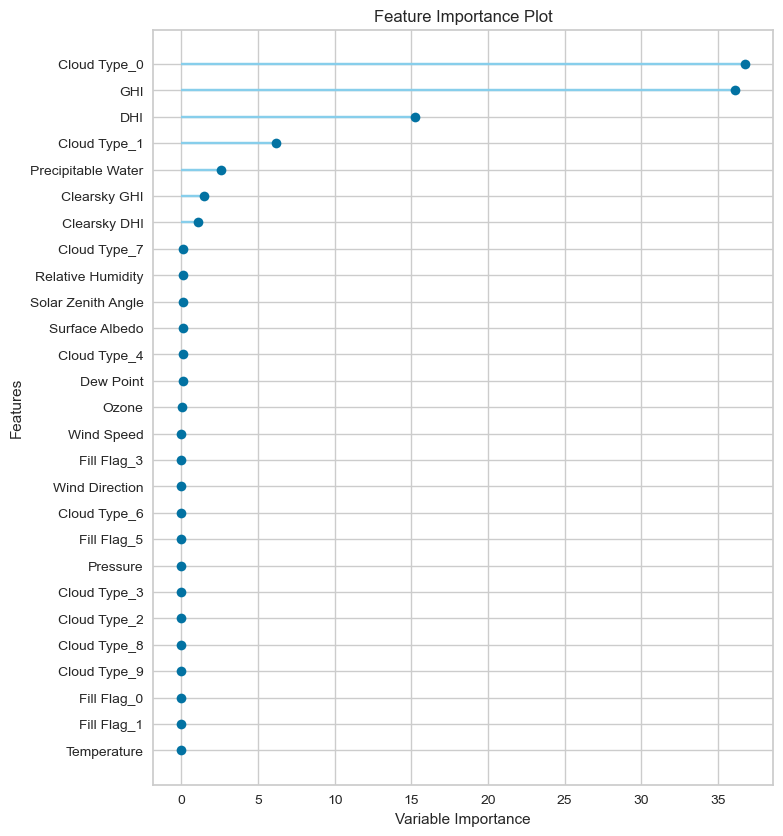

In [59]:
plot_model(final_catboost, plot='feature_all')

In [60]:
df1.columns

Index(['Temperature', 'Clearsky DHI', 'Clearsky GHI', 'Cloud Type',
       'Dew Point', 'DHI', 'DNI', 'Fill Flag', 'GHI', 'Ozone',
       'Relative Humidity', 'Solar Zenith Angle', 'Surface Albedo', 'Pressure',
       'Precipitable Water', 'Wind Direction', 'Wind Speed'],
      dtype='object')

In [61]:
df2 = df1.drop(['Fill Flag','Temperature', 'Wind Direction','Wind Speed', 'Pressure'], 1)

In [62]:
df2.shape

(3167, 12)

In [63]:
df2.columns

Index(['Clearsky DHI', 'Clearsky GHI', 'Cloud Type', 'Dew Point', 'DHI', 'DNI',
       'GHI', 'Ozone', 'Relative Humidity', 'Solar Zenith Angle',
       'Surface Albedo', 'Precipitable Water'],
      dtype='object')

In [64]:
reg = setup(data=df2,
           target='DNI', session_id = 123)

In [65]:
best = compare_models(exclude=['huber'])

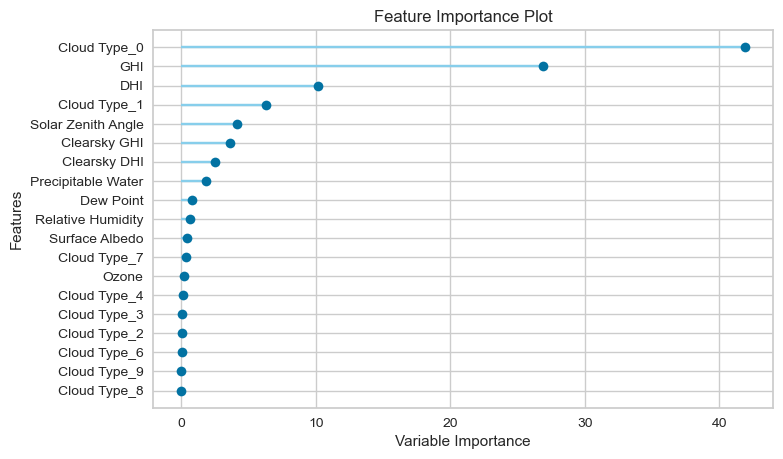

In [67]:
plot_model(best, plot='feature_all')

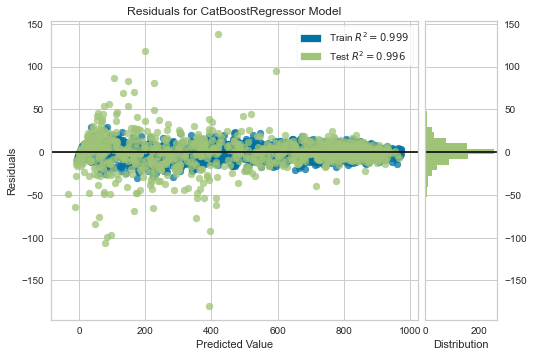

In [68]:
plot_model(best)

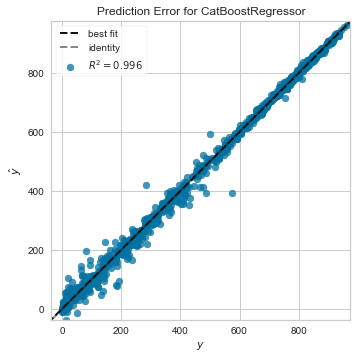

In [69]:
plot_model(best, plot='error')

In [70]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [71]:
df3 = df2.copy()

In [72]:
reg = setup(data=df3,
           target='DNI',
            normalize= True,
            session_id = 123)

In [73]:
best = compare_models(exclude=['huber'])

In [74]:
catboost = create_model('catboost')

In [75]:
print(catboost.feature_names_ )

['Clearsky DHI', 'Clearsky GHI', 'Dew Point', 'DHI', 'GHI', 'Ozone', 'Relative Humidity', 'Solar Zenith Angle', 'Surface Albedo', 'Precipitable Water', 'Cloud Type_0', 'Cloud Type_1', 'Cloud Type_2', 'Cloud Type_3', 'Cloud Type_4', 'Cloud Type_6', 'Cloud Type_7', 'Cloud Type_8', 'Cloud Type_9']


In [76]:
tuned_catboost = tune_model(catboost)

In [77]:
print(tuned_catboost.get_params())

{'depth': 6, 'l2_leaf_reg': 20, 'loss_function': 'RMSE', 'border_count': 254, 'verbose': False, 'random_strength': 0.0, 'task_type': 'CPU', 'n_estimators': 250, 'random_state': 123}


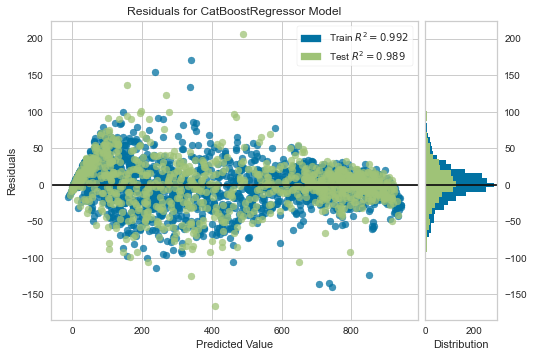

In [78]:
plot_model(tuned_catboost)

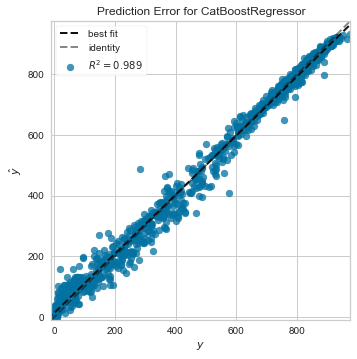

In [79]:
plot_model(tuned_catboost, plot = 'error')

In [80]:
final_catboost = finalize_model(tuned_catboost)

In [82]:
import pickle
model =final_catboost

In [85]:
final_catboost.feature_names_

['Clearsky DHI',
 'Clearsky GHI',
 'Dew Point',
 'DHI',
 'GHI',
 'Ozone',
 'Relative Humidity',
 'Solar Zenith Angle',
 'Surface Albedo',
 'Precipitable Water',
 'Cloud Type_0',
 'Cloud Type_1',
 'Cloud Type_2',
 'Cloud Type_3',
 'Cloud Type_4',
 'Cloud Type_6',
 'Cloud Type_7',
 'Cloud Type_8',
 'Cloud Type_9']

In [86]:
print(final_catboost.get_params())

{'depth': 6, 'l2_leaf_reg': 20, 'loss_function': 'RMSE', 'border_count': 254, 'verbose': False, 'random_strength': 0.0, 'task_type': 'CPU', 'n_estimators': 250, 'random_state': 123}


In [87]:
with open ('Lastversion','wb') as file:
  pickle.dump(model, file)